In [1]:
import sys
sys.path.append("../")

In [2]:
from src.bpdp import bp, bp1, bp2, k6
import torch
import torch.nn.functional as F
import torchaudio
import matplotlib.pyplot as plt
import math

In [4]:
sr=20000
fl=1000

In [5]:
def zff_fir(p=200, r=0.99, sr=8000):
    h = []
    for i in range(0, p+1): # 0-p
        c = math.comb(p, i)
        h_i = c * r**(p-i)
        h.append(h_i)
    m = max(h)
    h = [ x/m for x in h ] 
    h = torch.tensor(h)

    if sr != 8000:
        h = torchaudio.functional.resample(h, 8000, sr)
    
    return h

In [6]:
t = (torch.arange(fl) - fl//2) / sr
h = k6(t, wl=0.1)

In [7]:
g = zff_fir(p=400, sr=32000)

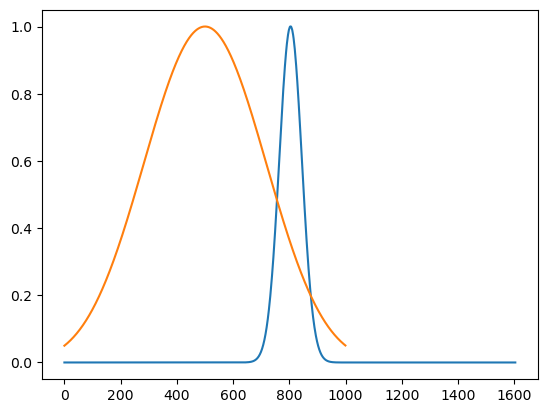

In [8]:
plt.plot(g)
plt.plot(h)

In [9]:
h = bp(sr=sr, fl=fl, f_lo=50.0, f_hi=550.0)

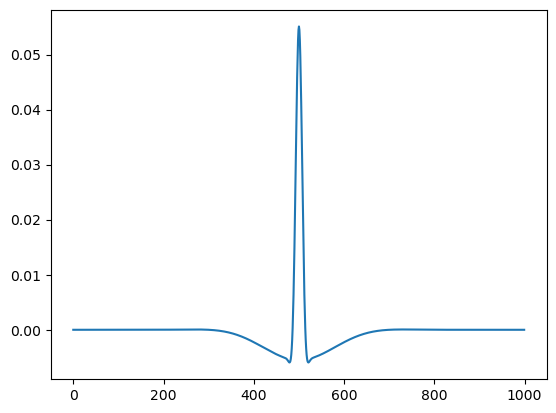

In [10]:
plt.plot(h)

In [83]:
# make fourier basis
n = torch.arange(0, fl)
w = 2 * torch.pi * torch.arange(0, 2000) / sr
e = torch.exp(-1j * w[:, None] * n[None, :])

In [84]:
H = torch.abs(e @ h.to(torch.cfloat))

Text(0, 0.5, 'Amplitude $|H(f)|$')

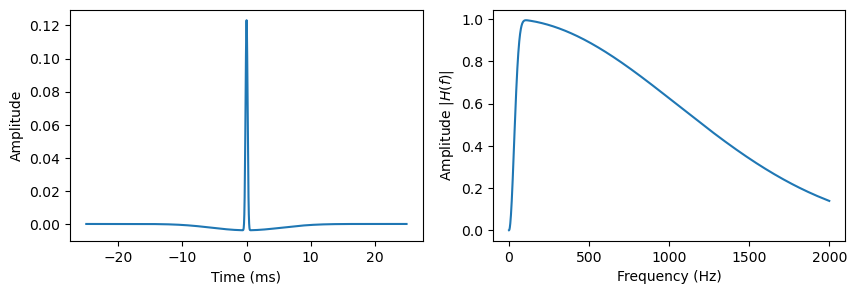

In [85]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].plot((n-500)/20, h)
ax[0].set_xlabel("Time (ms)")
ax[0].set_ylabel("Amplitude")
ax[1].plot(H)
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_ylabel("Amplitude $|H(f)|$")
#fig.savefig("BP.pdf", bbox_inches = 'tight',  pad_inches = 0.1)

In [90]:
h = bp1(sr=sr, wl_0=fl/sr, wl_1=0.002)
#t = (torch.arange(fl) - fl//2) / sr
#h = k6(t, wl=0.1)
H = torch.abs(e @ h.to(torch.cfloat))

In [91]:
h.shape

torch.Size([1000])

In [92]:
fl/sr

0.05

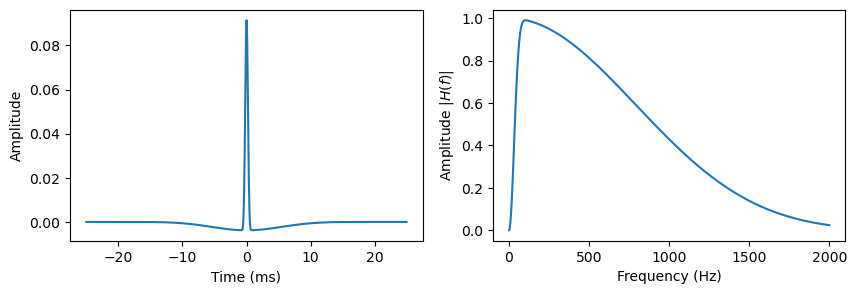

In [94]:
fig, ax = plt.subplots(1,2, figsize=(10,3))
ax[0].plot((n-500)/20, h)
ax[0].set_xlabel("Time (ms)")
ax[0].set_ylabel("Amplitude")
ax[1].plot(H)
ax[1].set_xlabel("Frequency (Hz)")
ax[1].set_ylabel("Amplitude $|H(f)|$")
fig.savefig("BP.pdf", bbox_inches = 'tight',  pad_inches = 0.1)

In [32]:
fl / sr

0.05